In [23]:
!pip install ultralytics roboflow matplotlib

Cloning into 'waste-detection-repo'...
fatal: could not read Username for 'https://github.com': No such device or address
/content/YOLO-DS


In [27]:
from roboflow import Roboflow

rf = Roboflow(api_key="roboflow key")
project = rf.workspace("workspace name").project("project name")
dataset = project.version(1).download("yolov8")

dataset_location = dataset.location





loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.34, to fix: `pip install ultralytics==8.0.196`


In [28]:
import os

for root, dirs, files in os.walk(dataset_location):
    level = root.replace(dataset_location, '').count(os.sep)
    indent = ' ' * 4 * (level)
    print('{}{}/'.format(indent, os.path.basename(root)))
    subindent = ' ' * 4 * (level + 1)
    for f in files:
        print('{}{}'.format(subindent, f))

TVM-Waste-Detection-Dataset-1/
    README.roboflow.txt
    data.yaml
    README.dataset.txt
    valid/
        labels/
            glass238_jpg.rf.a3c4be9af8e558a00796b188991d6ed9.txt
            cardboard273_jpg.rf.f1ed82879b1fdeeb7b37822bdb149f78.txt
            metal3_jpg.rf.5b07fcef2c453de3f595fd559af5bb16.txt
            metal45_jpg.rf.db4710936ff8da559f8e7211a0af09d6.txt
            glass411_jpg.rf.e26864d3f12e954a030360ba42848020.txt
            cardboard66_jpg.rf.4f28a90f851827bb66dc331e423904cc.txt
            paper368_jpg.rf.9723a65eba879e2adceaf5d97d5431af.txt
            cardboard390_jpg.rf.216eaf61c048fe5f1c41b87bc474a7d7.txt
            glass440_jpg.rf.1b30b21d0dad0dc7ad2bf8d7fb235740.txt
            cardboard3_jpg.rf.bd0788cc76a9539e39c449c6d80d4e31.txt
            metal290_jpg.rf.100fb72983770f6997adb96ba4640986.txt
            plastic162_jpg.rf.8b3f9d7b4b1e737e3525841112f7b1ca.txt
            plastic262_jpg.rf.58598f2f4d594fbf85dd10a94b9a678c.txt
            glass256_j

In [31]:
import pandas as pd
import yaml
import cv2

# Load the dataset configuration file
with open(os.path.join(dataset_location, "data.yaml"), 'r') as stream:
    dataset_config = yaml.safe_load(stream)

# Function to parse the labels
def parse_label_file(label_path):
    with open(label_path, 'r') as f:
        lines = f.readlines()
        bboxes = [list(map(float, line.split())) for line in lines]
    return bboxes

# Prepare data for the DataFrame
data = []
for split in ['train', 'valid', 'test']:
    img_dir = os.path.join(dataset_location, split, "images")
    label_dir = os.path.join(dataset_location, split, "labels")
    if not os.path.exists(img_dir):
        continue

    img_files = [f for f in os.listdir(img_dir) if os.path.isfile(os.path.join(img_dir, f))]
    for img_file in img_files:
        img_path = os.path.join(img_dir, img_file)
        label_path = os.path.join(label_dir, img_file.replace('.jpg', '.txt'))

        img = cv2.imread(img_path)
        height, width, _ = img.shape

        bboxes = parse_label_file(label_path)
        for bbox in bboxes:
            class_id, x_center, y_center, bbox_width, bbox_height = bbox
            data.append([img_file, width, height, class_id, x_center, y_center, bbox_width, bbox_height, split])

# Create a DataFrame
columns = ['image', 'width', 'height', 'class_id', 'x_center', 'y_center', 'bbox_width', 'bbox_height', 'split']
df = pd.DataFrame(data, columns=columns)

# Display the DataFrame
pd.set_option('display.max_rows', 10)  # to display all rows if needed
print(df)


                                                  image  width  height  \
0     cardboard252_jpg.rf.0b5b840e8076a3dbeae67413fc...    640     640   
1     paper62_jpg.rf.ef91974794040d8177ced85a01221f0...    640     640   
2     cardboard25_jpg.rf.16fc7edff0b8b05e4141b1bf6bf...    640     640   
3     paper106_jpg.rf.222d45293d4171f41932b684d7452a...    640     640   
4     glass246_jpg.rf.8e856a4446ae6501e1a100b22b492e...    640     640   
...                                                 ...    ...     ...   
2385  cardboard342_jpg.rf.72ef2969e4c215bd544f6bc320...    640     640   
2386  metal52_jpg.rf.7e25cce4318ec801792d9f49fb25bf3...    640     640   
2387  glass446_jpg.rf.6fe66b9dd55f580f3067c57185a2e0...    640     640   
2388  paper90_jpg.rf.cd096c0270de3910faf27063a7ade62...    640     640   
2389  glass204_jpg.rf.6b34451f3b3b9aaec256a70d131683...    640     640   

      class_id  x_center  y_center  bbox_width  bbox_height  split  
0          0.0  0.500000  0.500000    1.00

                                               image  width  height  class_id  \
0  cardboard252_jpg.rf.0b5b840e8076a3dbeae67413fc...    640     640       0.0   
1  paper62_jpg.rf.ef91974794040d8177ced85a01221f0...    640     640       3.0   
2  cardboard25_jpg.rf.16fc7edff0b8b05e4141b1bf6bf...    640     640       0.0   
3  paper106_jpg.rf.222d45293d4171f41932b684d7452a...    640     640       3.0   
4  glass246_jpg.rf.8e856a4446ae6501e1a100b22b492e...    640     640       1.0   

   x_center  y_center  bbox_width  bbox_height  split  
0  0.500000  0.500000    1.000000     1.000000  train  
1  0.444531  0.500000    0.250781     1.000000  train  
2  0.500000  0.500000    1.000000     1.000000  train  
3  0.505469  0.536719    0.813281     0.718750  train  
4  0.317969  0.616406    0.504687     0.336719  train  


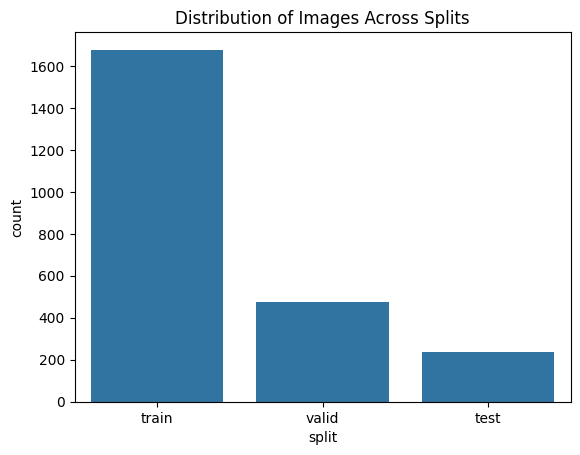

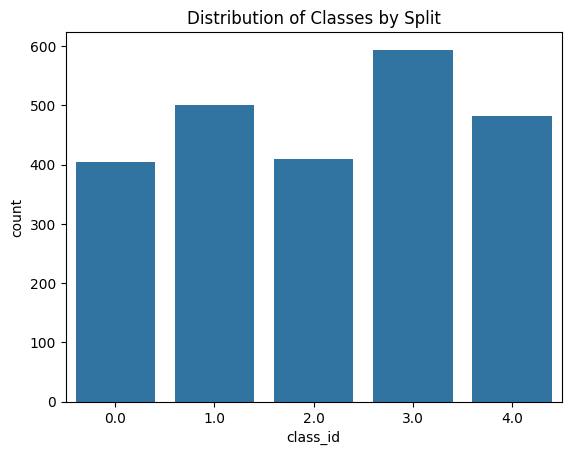

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display the first few rows of the DataFrame
print(df.head())

# Plot the distribution of images across different splits
sns.countplot(x='split', data=df)
plt.title('Distribution of Images Across Splits')
plt.show()

# Plot the distribution of classes
sns.countplot(x='class_id', data=df)
plt.title('Distribution of Classes by Split')
plt.show()


In [35]:
from ultralytics import YOLO
import numpy as np

# Load the YOLOv8 model
model = YOLO("yolov8n.pt")


patience = 10  # Number of epochs with no improvement after which training will be stopped
min_delta = 0.01  # Minimum change in the monitored quantity to qualify as an improvement
best_loss = np.inf
epochs_no_improve = 0

results = model.train(data=os.path.join(dataset_location, "data.yaml"), epochs=150, batch=16, imgsz=640, patience=10)


Ultralytics YOLOv8.2.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/YOLO-DS/TVM-Waste-Detection-Dataset-1/data.yaml, epochs=150, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_lab

100%|██████████| 755k/755k [00:00<00:00, 20.5MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)


AMP: checks passed ✅


train: Scanning /content/YOLO-DS/TVM-Waste-Detection-Dataset-1/train/labels... 1672 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1672/1672 [00:00<00:00, 1920.06it/s]

train: WARNING ⚠️ /content/YOLO-DS/TVM-Waste-Detection-Dataset-1/train/images/cardboard102_jpg.rf.b08a10acb25cf2d5264706513db6749d.jpg: 1 duplicate labels removed
train: New cache created: /content/YOLO-DS/TVM-Waste-Detection-Dataset-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/YOLO-DS/TVM-Waste-Detection-Dataset-1/valid/labels... 474 images, 0 backgrounds, 0 corrupt: 100%|██████████| 474/474 [00:00<00:00, 890.82it/s]


val: New cache created: /content/YOLO-DS/TVM-Waste-Detection-Dataset-1/valid/labels.cache
Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      2.45G      0.595      2.362      1.223         22        640: 100%|██████████| 105/105 [00:46<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/15 [00:00<?, ?it/s]Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.38it/s]

                   all        474        474      0.457       0.54      0.521      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      2.26G     0.6335      1.724      1.249         27        640: 100%|██████████| 105/105 [00:43<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.90it/s]

                   all        474        474      0.327      0.434      0.389      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      2.26G     0.6549      1.551      1.247         21        640: 100%|██████████| 105/105 [00:42<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:09<00:00,  1.59it/s]


                   all        474        474      0.347      0.372      0.318      0.171

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      2.26G     0.6374      1.415      1.234         25        640: 100%|██████████| 105/105 [00:41<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.81it/s]

                   all        474        474      0.488      0.698      0.645      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      2.26G     0.6426       1.36      1.233         23        640: 100%|██████████| 105/105 [00:42<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:08<00:00,  1.75it/s]


                   all        474        474      0.577      0.709      0.673      0.543

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      2.26G     0.6221      1.233      1.214         17        640: 100%|██████████| 105/105 [00:41<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.90it/s]

                   all        474        474       0.43      0.625      0.548      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      2.25G     0.6035      1.182      1.206         21        640: 100%|██████████| 105/105 [00:41<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  2.01it/s]

                   all        474        474      0.815      0.535      0.734      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      2.26G     0.5939      1.126      1.198         23        640: 100%|██████████| 105/105 [00:42<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.75it/s]

                   all        474        474      0.557      0.647      0.697      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      2.26G       0.57      1.044      1.183         22        640: 100%|██████████| 105/105 [00:42<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  2.12it/s]

                   all        474        474      0.753      0.634      0.722      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      2.26G     0.5423       1.02      1.161         20        640: 100%|██████████| 105/105 [00:43<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.41it/s]

                   all        474        474      0.663      0.671      0.714      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      2.25G     0.5426      1.015      1.165         18        640: 100%|██████████| 105/105 [00:41<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  2.00it/s]

                   all        474        474      0.808      0.724      0.838      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      2.26G     0.5406     0.9574      1.169         17        640: 100%|██████████| 105/105 [00:42<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.24it/s]

                   all        474        474       0.81      0.727       0.82      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      2.26G     0.5226     0.9381      1.151         19        640: 100%|██████████| 105/105 [00:42<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.87it/s]

                   all        474        474       0.74      0.763      0.808      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      2.26G     0.5069       0.92      1.145         23        640: 100%|██████████| 105/105 [00:42<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:08<00:00,  1.78it/s]

                   all        474        474      0.738      0.774      0.842      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      2.25G     0.5159     0.9232      1.145         20        640: 100%|██████████| 105/105 [00:42<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.84it/s]

                   all        474        474      0.699      0.791      0.839       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      2.26G     0.4955     0.8696      1.126         20        640: 100%|██████████| 105/105 [00:40<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:09<00:00,  1.59it/s]

                   all        474        474      0.754      0.675      0.799      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      2.26G     0.5028     0.8449      1.139         21        640: 100%|██████████| 105/105 [00:41<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.76it/s]

                   all        474        474      0.648       0.79      0.821      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      2.26G      0.504     0.8597      1.135         22        640: 100%|██████████| 105/105 [00:42<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  2.12it/s]

                   all        474        474      0.699      0.794      0.851      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      2.25G     0.4901     0.8221      1.126         21        640: 100%|██████████| 105/105 [00:42<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.50it/s]

                   all        474        474      0.654      0.783      0.845      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      2.26G     0.4797     0.8138      1.128         22        640: 100%|██████████| 105/105 [00:41<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.50it/s]

                   all        474        474      0.714      0.811      0.847      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      2.26G     0.4733     0.8023      1.117         18        640: 100%|██████████| 105/105 [00:43<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.23it/s]

                   all        474        474      0.814       0.72      0.852      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      2.26G     0.4817     0.7792      1.123         18        640: 100%|██████████| 105/105 [00:42<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.04it/s]

                   all        474        474      0.595      0.781      0.749       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      2.25G     0.4623     0.7785      1.111         25        640: 100%|██████████| 105/105 [00:42<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.96it/s]

                   all        474        474      0.777       0.78      0.852      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      2.26G     0.4637     0.7626      1.107         22        640: 100%|██████████| 105/105 [00:41<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.82it/s]

                   all        474        474      0.776      0.844       0.88      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      2.26G     0.4682     0.7458      1.121         17        640: 100%|██████████| 105/105 [00:41<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:09<00:00,  1.54it/s]

                   all        474        474      0.787       0.81      0.887      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      2.26G     0.4613     0.7359      1.107         23        640: 100%|██████████| 105/105 [00:41<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.02it/s]

                   all        474        474      0.797      0.827      0.902      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      2.25G     0.4408      0.732      1.093         20        640: 100%|██████████| 105/105 [00:40<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:08<00:00,  1.70it/s]

                   all        474        474      0.821      0.847      0.911      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      2.26G     0.4376     0.6876      1.092         17        640: 100%|██████████| 105/105 [00:40<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.92it/s]

                   all        474        474      0.741      0.793      0.881      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      2.26G     0.4501     0.7197      1.096         19        640: 100%|██████████| 105/105 [00:41<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:09<00:00,  1.60it/s]

                   all        474        474      0.803      0.847      0.892      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      2.26G     0.4553     0.7181      1.109         18        640: 100%|██████████| 105/105 [00:45<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.99it/s]

                   all        474        474      0.788       0.83      0.891      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      2.25G     0.4489     0.7196      1.099         26        640: 100%|██████████| 105/105 [00:42<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:08<00:00,  1.76it/s]

                   all        474        474      0.826      0.789      0.892      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      2.26G      0.432     0.6665      1.086         22        640: 100%|██████████| 105/105 [00:41<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.87it/s]

                   all        474        474      0.818      0.826      0.896      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      2.26G     0.4276     0.6725      1.083         22        640: 100%|██████████| 105/105 [00:42<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:08<00:00,  1.83it/s]

                   all        474        474      0.825       0.81      0.896      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      2.26G      0.422     0.6714      1.085         22        640: 100%|██████████| 105/105 [00:41<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.89it/s]

                   all        474        474      0.789       0.86      0.916      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      2.25G     0.4278      0.706      1.085         21        640: 100%|██████████| 105/105 [00:41<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.17it/s]

                   all        474        474      0.763      0.802      0.896      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      2.26G     0.4284     0.6594       1.09         17        640: 100%|██████████| 105/105 [00:41<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.44it/s]

                   all        474        474      0.784      0.872      0.913      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      2.26G     0.4266     0.6335      1.086         25        640: 100%|██████████| 105/105 [00:41<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.65it/s]

                   all        474        474      0.862      0.857      0.921      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      2.26G     0.4375     0.6339      1.086         24        640: 100%|██████████| 105/105 [00:42<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:08<00:00,  1.87it/s]

                   all        474        474      0.848      0.844      0.924      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      2.25G     0.4301     0.6427      1.089         19        640: 100%|██████████| 105/105 [00:41<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.84it/s]

                   all        474        474      0.879       0.87      0.935      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      2.26G     0.4268     0.6341       1.09         16        640: 100%|██████████| 105/105 [00:41<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:09<00:00,  1.65it/s]

                   all        474        474      0.884      0.869      0.924      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      2.26G     0.4106     0.6182      1.076         30        640: 100%|██████████| 105/105 [00:41<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.91it/s]

                   all        474        474      0.893       0.83      0.915      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      2.26G      0.418     0.6332      1.076         25        640: 100%|██████████| 105/105 [00:40<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.31it/s]

                   all        474        474      0.812      0.882      0.921      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      2.25G      0.413     0.5962      1.075         20        640: 100%|██████████| 105/105 [00:40<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.96it/s]

                   all        474        474      0.794      0.883       0.91      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      2.26G     0.4192     0.6287       1.08         20        640: 100%|██████████| 105/105 [00:41<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.07it/s]

                   all        474        474      0.868      0.831      0.911      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      2.26G     0.4289     0.6038      1.092         20        640: 100%|██████████| 105/105 [00:41<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:08<00:00,  1.74it/s]

                   all        474        474      0.859       0.81      0.891      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      2.26G     0.4114     0.6061      1.078         19        640: 100%|██████████| 105/105 [00:40<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.02it/s]

                   all        474        474      0.856      0.822      0.923      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      2.25G     0.4086     0.6073       1.08         18        640: 100%|██████████| 105/105 [00:40<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.53it/s]

                   all        474        474      0.817      0.873      0.919      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      2.26G     0.3964     0.5878      1.065         23        640: 100%|██████████| 105/105 [00:40<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:08<00:00,  1.77it/s]

                   all        474        474      0.883      0.869      0.933      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      2.26G     0.4172     0.5906      1.079         21        640: 100%|██████████| 105/105 [00:40<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.95it/s]

                   all        474        474      0.789      0.826      0.907      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      2.26G      0.389     0.5826      1.064         19        640: 100%|██████████| 105/105 [00:41<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:08<00:00,  1.79it/s]

                   all        474        474      0.828       0.85      0.925      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      2.25G     0.3988     0.5687      1.066         25        640: 100%|██████████| 105/105 [00:41<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.44it/s]

                   all        474        474      0.865      0.843      0.934      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      2.26G     0.3901     0.5814      1.058         22        640: 100%|██████████| 105/105 [00:40<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.92it/s]

                   all        474        474      0.872      0.811      0.912      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      2.26G     0.4024     0.5768      1.067         15        640: 100%|██████████| 105/105 [00:40<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  2.00it/s]

                   all        474        474      0.851      0.872      0.939      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      2.26G     0.3792     0.5647      1.059         19        640: 100%|██████████| 105/105 [00:40<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.97it/s]

                   all        474        474      0.838      0.842      0.911      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      2.25G     0.3935     0.5383      1.071         22        640: 100%|██████████| 105/105 [00:40<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.43it/s]

                   all        474        474      0.874      0.887      0.933      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      2.26G     0.3863     0.5436      1.056         24        640: 100%|██████████| 105/105 [00:39<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.52it/s]

                   all        474        474      0.881      0.868      0.938      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      2.26G     0.3798     0.5264      1.052         21        640: 100%|██████████| 105/105 [00:40<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.06it/s]

                   all        474        474      0.859      0.846      0.936       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      2.26G     0.3947     0.5356      1.063         23        640: 100%|██████████| 105/105 [00:41<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:08<00:00,  1.75it/s]

                   all        474        474      0.842       0.88      0.936      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      2.25G     0.3917     0.5411      1.065         19        640: 100%|██████████| 105/105 [00:39<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.07it/s]

                   all        474        474      0.825      0.869      0.935      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      2.26G     0.3808     0.5327      1.061         18        640: 100%|██████████| 105/105 [00:39<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.95it/s]

                   all        474        474       0.88      0.833      0.923      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      2.26G     0.3895     0.5227      1.057         20        640: 100%|██████████| 105/105 [00:40<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.27it/s]

                   all        474        474      0.832      0.862      0.927      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      2.26G     0.3698     0.5164      1.044         24        640: 100%|██████████| 105/105 [00:41<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.10it/s]

                   all        474        474      0.874       0.88      0.946        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      2.25G     0.3826     0.5005      1.051         25        640: 100%|██████████| 105/105 [00:40<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:08<00:00,  1.69it/s]

                   all        474        474      0.901      0.886      0.944      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      2.26G     0.3736     0.5092      1.054         24        640: 100%|██████████| 105/105 [00:40<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.93it/s]

                   all        474        474      0.911      0.858      0.942      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      2.26G     0.3822     0.5029      1.057         24        640: 100%|██████████| 105/105 [00:40<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.62it/s]

                   all        474        474       0.88      0.857      0.933      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      2.26G     0.3752     0.4895      1.055         21        640: 100%|██████████| 105/105 [00:40<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.32it/s]

                   all        474        474      0.882      0.885      0.952      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      2.25G     0.3811     0.5083      1.056         24        640: 100%|██████████| 105/105 [00:40<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.07it/s]

                   all        474        474      0.833      0.901      0.939      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      2.26G     0.3701     0.4933      1.042         16        640: 100%|██████████| 105/105 [00:40<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:08<00:00,  1.80it/s]

                   all        474        474      0.892      0.853      0.935      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      2.26G     0.3679      0.497      1.044         22        640: 100%|██████████| 105/105 [00:40<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  3.00it/s]

                   all        474        474      0.877      0.879      0.945      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      2.26G     0.3713     0.5098      1.048         21        640: 100%|██████████| 105/105 [00:41<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.72it/s]

                   all        474        474      0.874      0.864      0.943      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      2.25G      0.378     0.4762      1.053         19        640: 100%|██████████| 105/105 [00:40<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:08<00:00,  1.75it/s]

                   all        474        474      0.903       0.85       0.94      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      2.26G     0.3864     0.5122      1.061         15        640: 100%|██████████| 105/105 [00:40<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.99it/s]

                   all        474        474       0.84      0.869      0.936      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      2.26G     0.3792     0.4749      1.056         19        640: 100%|██████████| 105/105 [00:40<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]

                   all        474        474        0.9       0.85      0.935      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      2.26G     0.3654      0.471      1.042         28        640: 100%|██████████| 105/105 [00:40<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.15it/s]

                   all        474        474      0.907      0.859      0.949        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      2.25G     0.3638     0.4674       1.05         16        640: 100%|██████████| 105/105 [00:41<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.08it/s]

                   all        474        474      0.877      0.866      0.941       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      2.26G     0.3572     0.4699      1.045         20        640: 100%|██████████| 105/105 [00:39<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.88it/s]

                   all        474        474      0.912      0.886      0.951      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      2.26G     0.3683     0.4696      1.048         21        640: 100%|██████████| 105/105 [00:39<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.52it/s]

                   all        474        474      0.926      0.876      0.953      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      2.26G     0.3595     0.4773      1.041         27        640: 100%|██████████| 105/105 [00:41<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.07it/s]

                   all        474        474      0.846      0.901      0.928      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      2.25G     0.3554     0.4776      1.043         18        640: 100%|██████████| 105/105 [00:39<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:08<00:00,  1.75it/s]

                   all        474        474      0.885        0.9      0.947      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      2.26G     0.3534       0.45      1.036         20        640: 100%|██████████| 105/105 [00:39<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.00it/s]

                   all        474        474       0.91      0.854      0.948      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      2.26G      0.349      0.454      1.045         23        640: 100%|██████████| 105/105 [00:40<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.41it/s]

                   all        474        474      0.914      0.878      0.948      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      2.26G     0.3472     0.4398      1.036         21        640: 100%|██████████| 105/105 [00:40<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]

                   all        474        474      0.915      0.887      0.952      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      2.25G     0.3475     0.4303      1.026         20        640: 100%|██████████| 105/105 [00:39<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.06it/s]

                   all        474        474      0.901      0.881      0.949      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      2.26G      0.362     0.4585      1.039         17        640: 100%|██████████| 105/105 [00:41<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.21it/s]

                   all        474        474      0.878      0.895      0.948      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      2.26G     0.3586     0.4434      1.043         12        640: 100%|██████████| 105/105 [00:41<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  2.06it/s]

                   all        474        474      0.917      0.894      0.955      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      2.26G     0.3427     0.4156      1.032         22        640: 100%|██████████| 105/105 [00:41<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.00it/s]

                   all        474        474       0.92      0.899      0.955      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      2.25G      0.337     0.4279      1.026         22        640: 100%|██████████| 105/105 [00:40<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:08<00:00,  1.71it/s]

                   all        474        474      0.899      0.913       0.96      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      2.26G     0.3425     0.4394      1.033         21        640: 100%|██████████| 105/105 [00:41<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.98it/s]

                   all        474        474      0.884      0.886       0.95      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      2.26G     0.3478     0.4364      1.035         28        640: 100%|██████████| 105/105 [00:42<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.69it/s]

                   all        474        474      0.909      0.901      0.958      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      2.26G     0.3469     0.4196      1.031         22        640: 100%|██████████| 105/105 [00:41<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  2.01it/s]

                   all        474        474      0.933      0.863      0.956      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      2.25G     0.3444     0.4266      1.034         26        640: 100%|██████████| 105/105 [00:40<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.93it/s]

                   all        474        474      0.911      0.912      0.957      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      2.26G     0.3432     0.4221      1.036         27        640: 100%|██████████| 105/105 [00:40<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:08<00:00,  1.82it/s]

                   all        474        474      0.923      0.883      0.958      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      2.26G     0.3495     0.4186      1.038         25        640: 100%|██████████| 105/105 [00:40<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.04it/s]

                   all        474        474      0.885      0.896      0.955      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      2.26G     0.3466     0.4149      1.037         20        640: 100%|██████████| 105/105 [00:41<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.50it/s]

                   all        474        474      0.899      0.913      0.965      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      2.25G     0.3407     0.4105      1.028         18        640: 100%|██████████| 105/105 [00:40<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.93it/s]

                   all        474        474      0.925      0.912      0.965      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      2.26G     0.3378     0.4169      1.028         22        640: 100%|██████████| 105/105 [00:39<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.02it/s]

                   all        474        474      0.926      0.887      0.961      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      2.26G     0.3366     0.4045      1.023         26        640: 100%|██████████| 105/105 [00:41<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:09<00:00,  1.64it/s]

                   all        474        474      0.904      0.905      0.959       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      2.26G     0.3392     0.4256      1.034         13        640: 100%|██████████| 105/105 [00:40<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.98it/s]

                   all        474        474      0.901      0.903       0.95       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      2.25G     0.3337     0.3932      1.024         19        640: 100%|██████████| 105/105 [00:39<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.34it/s]

                   all        474        474      0.892      0.907      0.948      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      2.26G     0.3372     0.3985      1.031         22        640: 100%|██████████| 105/105 [00:40<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  2.09it/s]

                   all        474        474      0.917      0.913      0.959      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      2.26G      0.334     0.3831      1.023         22        640: 100%|██████████| 105/105 [00:39<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.96it/s]

                   all        474        474      0.912      0.925      0.966      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      2.26G     0.3347     0.3809      1.021         23        640: 100%|██████████| 105/105 [00:40<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:09<00:00,  1.60it/s]

                   all        474        474      0.927      0.911      0.963      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      2.25G     0.3238     0.3721      1.022         21        640: 100%|██████████| 105/105 [00:41<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.98it/s]

                   all        474        474      0.932      0.875       0.95      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      2.26G     0.3381     0.3802      1.034         20        640: 100%|██████████| 105/105 [00:41<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.81it/s]

                   all        474        474      0.932      0.905      0.962      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      2.26G     0.3454     0.4005      1.025         17        640: 100%|██████████| 105/105 [00:40<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:08<00:00,  1.77it/s]

                   all        474        474      0.885      0.917      0.957      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      2.26G     0.3269     0.3863      1.023         24        640: 100%|██████████| 105/105 [00:40<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.03it/s]

                   all        474        474      0.892      0.946      0.968      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      2.25G     0.3223     0.3836      1.024         25        640: 100%|██████████| 105/105 [00:40<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:08<00:00,  1.85it/s]

                   all        474        474      0.922      0.908      0.964      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      2.26G     0.3237     0.3828       1.02         26        640: 100%|██████████| 105/105 [00:40<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.83it/s]

                   all        474        474      0.938      0.878      0.962       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      2.26G      0.316     0.3762      1.017         20        640: 100%|██████████| 105/105 [00:42<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  2.13it/s]

                   all        474        474      0.921      0.903      0.962       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      2.26G     0.3147      0.369      1.019         22        640: 100%|██████████| 105/105 [00:41<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.44it/s]

                   all        474        474      0.894      0.909       0.96      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      2.25G        inf     0.3812       1.02         20        640: 100%|██████████| 105/105 [00:39<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.93it/s]

                   all        474        474      0.892      0.938      0.956      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      2.26G     0.3152     0.3606      1.012         21        640: 100%|██████████| 105/105 [00:39<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:08<00:00,  1.82it/s]

                   all        474        474      0.919       0.92      0.967      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      2.26G     0.3135     0.3713      1.017         23        640: 100%|██████████| 105/105 [00:38<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.83it/s]

                   all        474        474      0.911      0.916      0.964      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      2.26G     0.3204     0.3763      1.017         22        640: 100%|██████████| 105/105 [00:39<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.90it/s]

                   all        474        474      0.925       0.92      0.967      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      2.25G     0.3132     0.3684      1.011         29        640: 100%|██████████| 105/105 [00:40<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.66it/s]

                   all        474        474      0.929      0.913       0.96      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      2.26G     0.3048     0.3526      1.006         26        640: 100%|██████████| 105/105 [00:39<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.93it/s]

                   all        474        474      0.907      0.912      0.962      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      2.26G     0.3172     0.3648      1.017         25        640: 100%|██████████| 105/105 [00:39<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:09<00:00,  1.62it/s]

                   all        474        474      0.946      0.895      0.962      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      2.26G     0.3124     0.3466      1.018         19        640: 100%|██████████| 105/105 [00:40<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.06it/s]

                   all        474        474      0.935      0.915      0.964      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      2.25G     0.3115     0.3533      1.008         20        640: 100%|██████████| 105/105 [00:39<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.33it/s]

                   all        474        474      0.927      0.922      0.971      0.941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      2.26G     0.3161     0.3427      1.011         18        640: 100%|██████████| 105/105 [00:39<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.23it/s]

                   all        474        474      0.933      0.925      0.971      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      2.26G     0.3083     0.3556      1.018         18        640: 100%|██████████| 105/105 [00:39<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.93it/s]

                   all        474        474      0.906      0.929       0.97      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      2.26G     0.3038     0.3424      1.009         17        640: 100%|██████████| 105/105 [00:41<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.90it/s]

                   all        474        474      0.914       0.93      0.963      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      2.25G     0.3091     0.3449      1.008         20        640: 100%|██████████| 105/105 [00:39<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.45it/s]

                   all        474        474      0.939      0.925      0.962      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      2.26G      0.308     0.3477      1.011         17        640: 100%|██████████| 105/105 [00:39<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.08it/s]

                   all        474        474       0.92      0.929      0.967      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      2.26G     0.3177     0.3491      1.018         26        640: 100%|██████████| 105/105 [00:40<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:08<00:00,  1.77it/s]

                   all        474        474      0.933      0.932      0.969      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      2.26G     0.3028     0.3467      1.009         21        640: 100%|██████████| 105/105 [00:39<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.13it/s]

                   all        474        474      0.936      0.921      0.974      0.944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      2.25G     0.3023     0.3403      1.005         25        640: 100%|██████████| 105/105 [00:40<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.66it/s]

                   all        474        474       0.92      0.928      0.968      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      2.26G      0.301      0.342      1.004         17        640: 100%|██████████| 105/105 [00:39<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  2.05it/s]

                   all        474        474       0.94      0.909      0.973      0.949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      2.26G     0.3082     0.3324      1.009         22        640: 100%|██████████| 105/105 [00:39<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.01it/s]

                   all        474        474      0.906      0.934      0.974      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      2.26G     0.3021     0.3331      1.006         21        640: 100%|██████████| 105/105 [00:40<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.90it/s]

                   all        474        474       0.95      0.896      0.966       0.94



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      2.25G     0.3119     0.3338      1.014         22        640: 100%|██████████| 105/105 [00:42<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.05it/s]

                   all        474        474      0.942      0.899       0.97      0.944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      2.26G     0.3044      0.324      1.007         16        640: 100%|██████████| 105/105 [00:40<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.34it/s]

                   all        474        474      0.943      0.897      0.968      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      2.26G     0.3014      0.336      1.011         16        640: 100%|██████████| 105/105 [00:40<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  2.07it/s]

                   all        474        474      0.919      0.905      0.966      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      2.26G     0.2962     0.3183      1.014         17        640: 100%|██████████| 105/105 [00:41<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.05it/s]

                   all        474        474      0.918      0.941       0.97      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      2.25G     0.2976     0.3326      1.008         23        640: 100%|██████████| 105/105 [00:40<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.22it/s]

                   all        474        474      0.951      0.915      0.973      0.944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      2.26G     0.3002     0.3138      1.005         18        640: 100%|██████████| 105/105 [00:39<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  2.11it/s]

                   all        474        474      0.944      0.915      0.972      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      2.26G     0.2965     0.3267      1.008         18        640: 100%|██████████| 105/105 [00:39<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.65it/s]

                   all        474        474      0.944      0.907       0.97      0.942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      2.26G     0.2928     0.3194     0.9995         22        640: 100%|██████████| 105/105 [00:40<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.96it/s]

                   all        474        474      0.924      0.929      0.968      0.941
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 128, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



138 epochs completed in 1.862 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.3MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.2.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:08<00:00,  1.70it/s]


                   all        474        474      0.939      0.908      0.973      0.949
             cardboard         81         81      0.972      0.938      0.985       0.95
                 glass        101        101       0.94      0.842      0.953      0.934
                 metal         81         81      0.879      0.926      0.968      0.955
                 paper        116        116      0.982      0.952      0.989      0.968
               plastic         95         95      0.921      0.884      0.969      0.938
Speed: 0.4ms preprocess, 2.5ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/detect/train3


In [37]:
from ultralytics.utils.plotting import plot_results

results1 = plot_results('/content/YOLO-DS/runs/detect/train3/results.csv', segment=True)

In [38]:
# Evaluate the model
metrics = model.val()

# Print evaluation metrics
print("Precision: ", metrics.box.map50)
print("Recall: ", metrics.box.map75)
print("mAP@50: ", metrics.box.map)
print("mAP@75: ", metrics.box.map75)


Ultralytics YOLOv8.2.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/YOLO-DS/TVM-Waste-Detection-Dataset-1/valid/labels.cache... 474 images, 0 backgrounds, 0 corrupt: 100%|██████████| 474/474 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09<00:00,  3.22it/s]


                   all        474        474       0.94      0.909      0.973      0.949
             cardboard         81         81      0.971      0.938      0.985       0.95
                 glass        101        101      0.945      0.845      0.953      0.934
                 metal         81         81      0.879      0.926      0.968      0.955
                 paper        116        116      0.982      0.952      0.989      0.968
               plastic         95         95      0.921      0.884      0.969      0.938
Speed: 0.4ms preprocess, 5.5ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/train32
Precision:  0.9729448011117234
Recall:  0.9684999871907809
mAP@50:  0.9489528195380632
mAP@75:  0.9684999871907809
